# Hello, Julia!

I am a starter of `Julia`.

In [ ]:
welcome = "Hello, Julia!"
println(welcome)

In [ ]:
A = [1,2,.5]
B = [2,2,2]
A ≠ B

In [ ]:
3angle(1+√3im)

In [ ]:
a = 2 + Inf*im
a^2

## 数值计算

In [30]:
∞ = Inf
3//7 == 3/7 # false
3//4 == 3/4 # true
1//0 == ∞ # true
3//5 - 0.5 # 0.09999999999999998
0.6 - 0.5 # 0.09999999999999998
typeof(3//4) # Rational{Int64}
float(3//10) == 3/10 # true
0.5 - 0.6

ℯ

ℯ = 2.7182818284590...

## 字符串

In [ ]:
str = "Hello, 世界！"
str[begin] # 'H': ASCII/Unicode U+0048 (category Lu: Letter, uppercase)
str[end]
println("lastindex(str)/$(lastindex(str)) == length(str)/$(length(str)): \
$(lastindex(str) == length(str))") # lastindex(str)/14 == length(str)/10: false
str[11] # '界': Unicode U+754C (category Lo: Letter, other)
# str[12] # StringIndexError: invalid index [12], valid nearby indices [11]=>'界', [14]=>'！'
str[nextind(str, 11)] # '！': Unicode U+FF01 (category Po: Punctuation, other)
# str[10:14] # StringIndexError: invalid index [10], valid nearby indices [8]=>'世', [11]=>'界'
str[prevind(str, 12, 2):nextind(str, 12)] # "世界！"

c = match(r"^\s*(?:#|$)", "not a comment")
isnothing(c)

## 函数

In [143]:
fx(g, x) = g(x)
fx(3) do x
    x^2
end
X = [10,100,1000]
Y = [4,9,16]
Z = [-10,-100,-1]
sqrt.(log10.(X))
X .|> log10 .|> sqrt
broadcast!(sqrt, float(X), Y)
@. X |> log10 |> sqrt
[1:5;] .|> [x->x^2, sqrt, x->2*x, -, isodd]

# argument edit?
mutable struct People 
    name::String
end
pp = People("Zhang")
# here we need not make `changename!()`, `People` is mutable
changename(people::People) = (people.name = "Lee")
changename(pp)
pp


People("Lee")

## 流程控制

In [31]:
for i ∈ [1:5;]
    print(i^2, ",")
end
for (j, k) in zip([1 2 3], [4 5 6 7])
    print((j,k), ",")
end
println()
for i = 1:3:20
    print(i, ",")
end


1,4,9,16,25,(1, 4),(2, 5),(3, 6),
1,4,7,10,13,16,19,

## 复合类型

In [2]:
mutable struct Foo
    bar
    baz::Int
    qux::Float64
end
foo = Foo("hello", 1, 0.33)

T::DataType = typeof(foo.bar) 
FI = Union{Foo, Int}
foo1::FI = Foo(1,2,3)
foo2::FI = 5

In [8]:
for p in fieldnames(Foo)
    print(p, ", type: ", typeof(p), "|")
end
# bar, type: Symbol|baz, type: Symbol|qux, type: Symbol|
foo1 = 8
foo2 = Foo(6,6,6)
print("\n", foo1, " | ", foo2)


bar, type: Symbol|baz, type: Symbol|qux, type: Symbol|
8 | Foo(6, 6, 6.0)

In [3]:
struct Point{T}
    x::T
    y::T
end
# function norm(p::Point{T} where T<:Real)
# function norm(p::Point{T}) where T<:Real
function norm(p::Point{<:Real})
    sqrt(p.x^2 + p.y^2)
end
Point(1.0,2.0) |> norm
Point(3,4) |> norm

mytupletype = Tuple{AbstractString,Vararg{Int}}
isa(("1",1,2,3.0), mytupletype)

false

In [32]:

struct Polar{T<:Real} <: Number
    r::T
    Θ::T
end
Polar(r::Real,Θ::Real) = Polar(promote(r,Θ)...)
Base.show(io::IO, z::Polar) = print(io, z.r, " * exp(", z.Θ, "im)")
Base.show(io::IO, ::MIME"text/plain", z::Polar{T}) where{T} = print(io, "Polar{$T} complex number:\n   ", z)

Base.show(io::IO, ::MIME"text/html", z::Polar{T}) where {T} =
           println(io, "<code>Polar{$T}</code> complex number: ",
                   z.r, " <i>e</i><sup>", z.Θ, " <i>i</i></sup>")


Polar(3, 4.0)

Polar{Float64} complex number:
   3.0 * exp(4.0im)

## Profile

In [45]:
using Profile

fx() = for i=1:10000; sum(1/n^4 for n=1:10000); end
@time fx()


  0.364536 seconds


## Using `Gadfly`

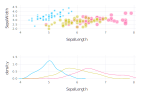

In [48]:
using Gadfly, RDatasets

iris = dataset("datasets", "iris")
theme1 = Theme(key_position=:none)
fig1a = plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species, theme1,
          alpha=[0.6], size=:PetalLength, Scale.size_area(maxvalue=7))
fig1b = plot(iris, x=:SepalLength, color=:Species, Geom.density,
          Guide.ylabel("density"), Coord.cartesian(xmin=4, xmax=8), theme1)
vstack(fig1a,fig1b)

## Using `GLMakie`

### Startup

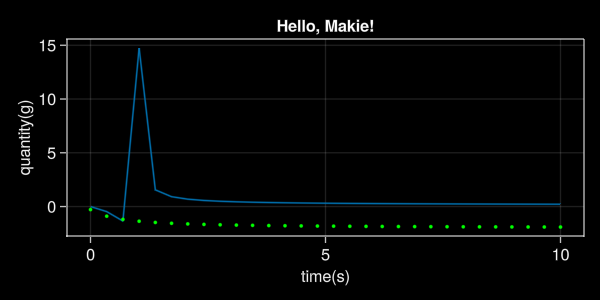

In [82]:
using GLMakie

f = Figure(backgroudcolor = :tomato, resolution = (600, 300))
ax = Axis(f[1,1],
    title = "Hello, Makie!",
    xlabel = "time(s)",
    ylabel = "quantity(g)"
)
x = range(0, 10, length = 30)
y₁ = 1 ./ log.(x.^2)
y₂ = ℯ .^ (1 ./ (x .+ 1)) .- 3
lines!(ax, x, y₁)
scatter!(ax, x, y₂; color = "#0f0", markersize = 5)
f

### Inline

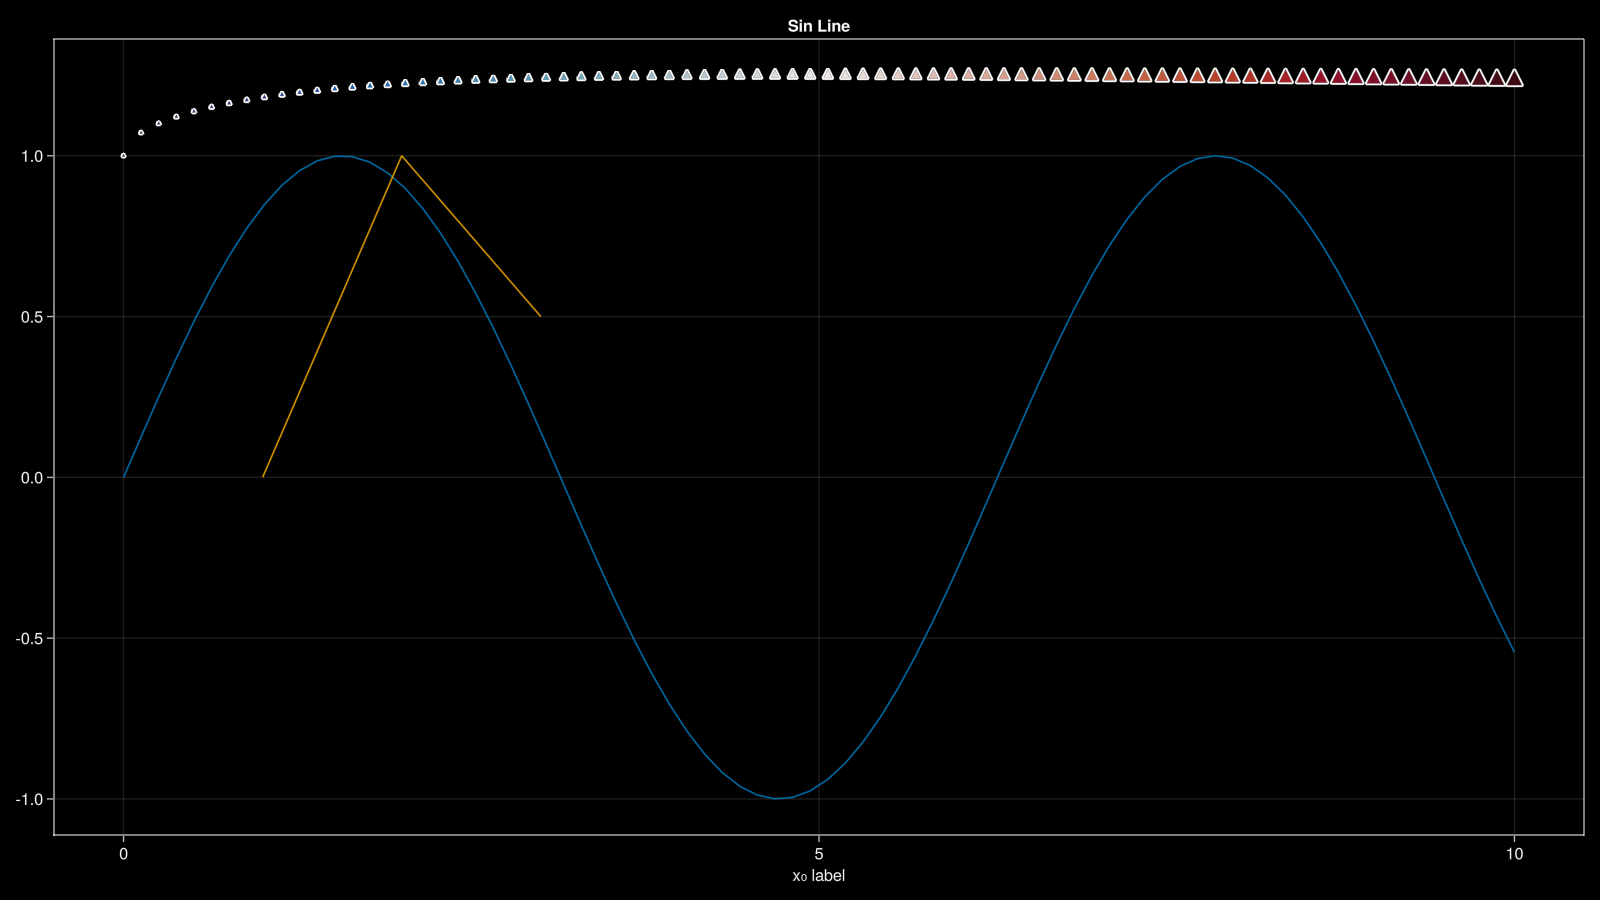

In [141]:
x₀ = range(0, 10, length=80)
y₃ = sin.(x₀)
figure, axis, lineplot = lines(x₀, y₃,
    figure = (; resolution = (1600, 900)),
    axis = (; title = "Sin Line", xlabel = "x₀ label")
)
lines!(axis, [Point(1,0), Point(2,1), Point(3,0.5)])

ϕ₍x₀₎ = ℯ .^ (.√x₀ ./ (x₀ .+ 5))
dotted = scatter!(
    x₀, ϕ₍x₀₎; 
    marker = :utriangle,
    markersize = range(3, 20, length=length(x₀)),
    color = range(0, 1, length=length(x₀)),
    colormap = :balance
)
dotted.strokewidth = 2
dotted.strokecolor = "#fff"
axislegend()
current_figure()

figure

### Layout

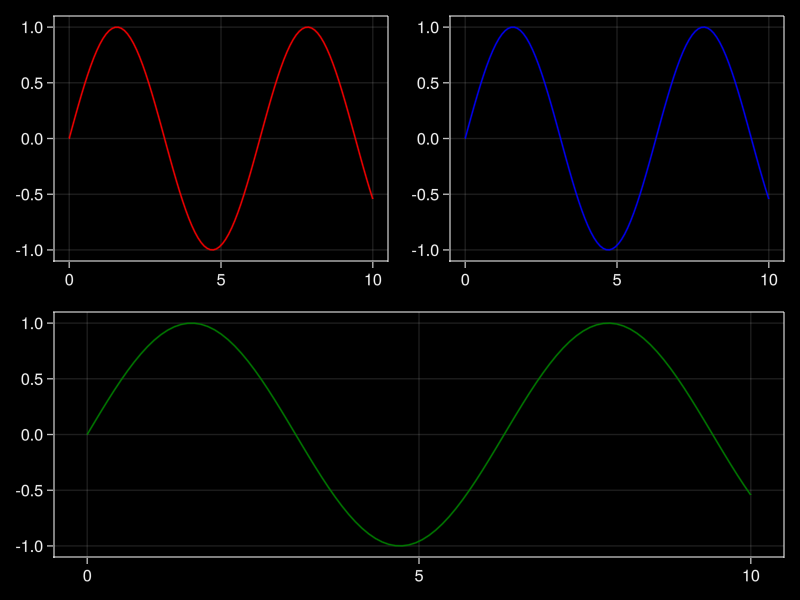

In [145]:
x = LinRange(0, 10, 100)
y = sin.(x)

fig = Figure()
lines(fig[1, 1], x, y, color = :red)
lines(fig[1, 2], x, y, color = :blue)
lines(fig[2, 1:2], x, y, color = :green)

fig

### Legend

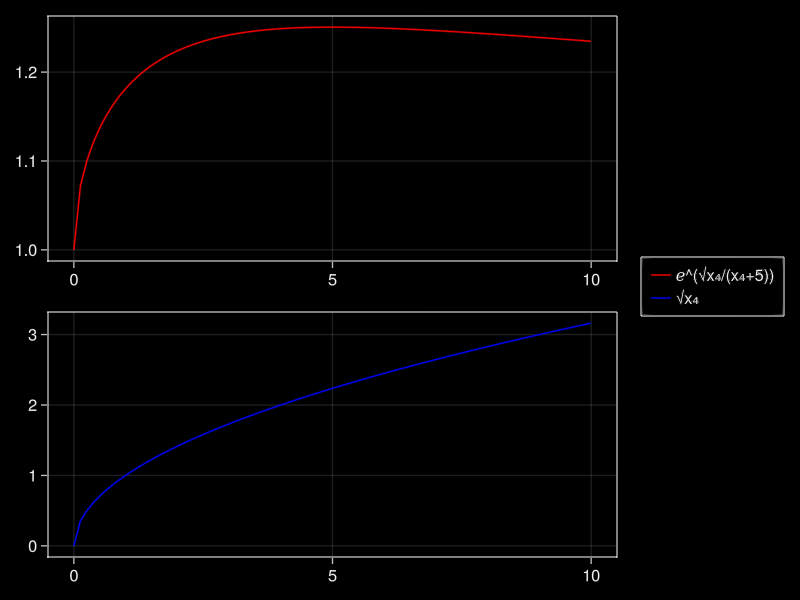

In [149]:
fig = Figure()
x₄ = range(0, 10, length=80)
ϕ₍x₄₎ = ℯ .^ (.√x₄ ./ (x₄ .+ 5))
ψ₍x₄₎ = .√x₄
ax1, l1 = lines(fig[1, 1], x₄, ϕ₍x₄₎, color = :red)
ax2, l2 = lines(fig[2, 1], x₄, ψ₍x₄₎, color = :blue)
Legend(fig[1:2, 2], [l1, l2], ["ℯ^(√x₄/(x₄+5))", "√x₄"])
fig